# Assignment 2: Working with health data from wearables

## Data

In this assigment you will use the [Daily Sports and Activities](http://archive.ics.uci.edu/ml/datasets/Daily+and+Sports+Activities) dataset from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.html). This dataset contains motion sensor data of 19 daily and sports activities (walking, running, rowing, jumping,...), each performed by 8 subjects in their own style for 5 minutes. Five Xsens MTx units are used on the torso, (right and left) arms, and (right and left) legs. 

----

## Objectives

- Understand time-series health data
- Perform pre-processing and visualisation on time-series data
- Extract features from time-series data
- Train a classifier to predict the activity the users are doing

----

## Exercise 1

Load, analyse and visualise the (temporal) data of the different sensors for subject 7 (p7). Compare walking on a treadmill with a speed of 4 km/h on a flat surface (a10) and running on a treadmill with a speed of 8 km/h (a12). Do you see any difference? Comment.
 

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import stats
from collections import defaultdict
from scipy.fftpack import rfft 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
# Your solution here:

##### Retrieving data for patient p7 - activities a10 and a12

In [3]:
# reading data from a10 p7
filelist_a10_p7 = os.listdir("C://Users//Margarida//Desktop//Mestrado//2nd semester//Data Science for Health//Assignment 2//data1//data//a10//p7//")
df_list_a10_p7 = [pd.read_csv('C://Users//Margarida//Desktop//Mestrado//2nd semester//Data Science for Health//Assignment 2//data1//data//a10//p7//' + file, sep = ",", header = None) for file in filelist_a10_p7]
data_a10_p7 = pd.concat(df_list_a10_p7) 

# reading data from a12 p7
filelist_a12_p7 = os.listdir("C://Users//Margarida//Desktop//Mestrado//2nd semester//Data Science for Health//Assignment 2//data1//data//a12//p7//")
df_list_a12_p7 = [pd.read_csv('C://Users//Margarida//Desktop//Mestrado//2nd semester//Data Science for Health//Assignment 2//data1//data//a12//p7//' + file, sep = ",", header = None) for file in filelist_a10_p7]
data_a12_p7 = pd.concat(df_list_a12_p7) 

# resetting indexes
data_a10_p7.reset_index(drop=True, inplace=True)
data_a12_p7.reset_index(drop=True, inplace=True)

##### Visualizing the extracted data

In [4]:
data_a10_p7

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,9.3105,0.587000,-1.22880,-0.243650,-1.10660,0.037636,-0.72318,0.12456,-0.70206,5.0612,...,0.076493,-9.8361,-0.18946,-1.565400,-0.407760,0.37506,1.13070,1.02110,0.36735,-0.165180
1,12.0460,-0.086358,0.52566,-0.179740,0.85106,0.270410,-0.72236,0.13881,-0.69857,5.3809,...,0.081997,-9.1952,-2.43550,-0.948150,-0.036454,0.27783,0.87566,1.04600,0.34339,-0.189730
2,9.2470,-2.045200,10.73400,-1.551400,-0.60079,0.369790,-0.71560,0.16523,-0.70152,4.9954,...,0.075714,-8.5541,0.87487,-2.190800,-0.636590,0.42847,0.99528,1.06150,0.33070,-0.197990
3,7.4230,-2.820000,2.47950,-0.806630,0.22937,0.226170,-0.71067,0.19402,-0.70193,4.9443,...,0.019514,-9.1001,0.52867,-0.714470,-1.499400,0.35843,0.87873,1.07960,0.32330,-0.185960
4,4.4586,-1.529200,4.25580,0.330460,-0.11867,0.068550,-0.70185,0.20103,-0.70638,5.8938,...,-0.046420,-8.8194,-2.32180,0.223770,-0.307580,0.24665,0.94289,1.09740,0.31584,-0.167440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,13.0260,-2.090000,3.41400,-0.733180,0.56922,-0.295890,-0.75816,0.22565,-0.67215,3.5181,...,-0.248260,-8.3513,-11.45300,-1.206700,-1.963200,-0.35229,-1.65000,1.12780,0.16460,-0.102240
7496,9.8045,-3.229600,2.15120,-0.465240,0.13433,-0.281310,-0.74811,0.22905,-0.68297,4.9081,...,-0.196610,-9.5351,-2.80570,-1.106300,-0.125010,0.16983,-3.20200,1.09900,0.24297,-0.071200
7497,6.8882,-3.021700,0.45185,-0.574540,-0.24699,-0.070430,-0.75187,0.23572,-0.68104,5.4628,...,-0.180820,-23.3450,4.16910,-3.420000,-1.758600,1.20250,-2.99880,1.05060,0.32943,-0.017143
7498,6.4846,-3.741100,-0.39146,0.319280,-0.69247,0.094932,-0.75965,0.23447,-0.66987,5.2400,...,-0.145220,-13.8020,2.70840,-0.035537,-1.513800,1.64410,-2.86410,0.98696,0.39303,0.103510


In [5]:
data_a12_p7

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,20.6030,-1.37780,8.62010,1.89800,0.26148,-0.30337,-0.90140,0.212530,-0.57884,2.9180,...,-0.088492,-23.9930,-0.36275,5.10250,-0.29726,1.074700,-3.33850,0.95984,0.41179,0.099259
1,45.3020,-6.08260,5.55390,2.16870,-2.55130,1.55800,-0.99409,0.132640,-0.46885,5.7983,...,-0.029506,-24.3200,7.54730,1.39820,0.21072,0.795750,-3.93880,0.86717,0.52657,0.160060
2,13.6200,3.49220,-0.39839,3.38710,4.34650,-0.35181,-0.96845,0.115660,-0.50603,2.8863,...,-0.049180,-15.1510,7.86050,2.10670,-0.22140,0.854630,-3.30470,0.75126,0.63382,0.205570
3,7.6722,-0.92661,6.94340,1.98230,-0.21781,-0.52051,-0.91089,0.050433,-0.58311,5.3755,...,0.006264,-10.7170,6.52490,4.29950,0.30123,0.528250,-1.05610,0.69343,0.68394,0.195210
4,6.4156,-2.28970,0.18084,-0.93262,0.60615,0.46005,-0.87487,0.039289,-0.60690,4.8349,...,0.080915,-2.4467,13.19200,0.63253,4.97850,0.131000,0.59898,0.69825,0.70404,0.078655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-3.1025,5.65030,-3.23360,-1.27080,-1.83460,-0.90296,-0.78864,-0.001589,-0.65606,3.8507,...,0.143690,-3.5330,-10.73200,4.00150,2.21070,-0.301190,-0.20013,0.89038,0.63903,-0.111490
7496,-3.6930,3.84300,-5.84620,-1.75420,-2.79180,-1.64210,-0.84638,-0.002098,-0.57030,3.9235,...,0.108190,-35.7560,-29.58100,-9.80130,1.08140,3.651500,-1.24390,0.90530,0.61314,-0.060199
7497,14.6930,5.90460,-17.40700,2.96150,-1.21430,1.23160,-0.95927,0.023008,-0.39422,5.5976,...,0.143110,-8.4985,33.08800,-2.32150,-1.41340,-0.061114,1.38910,0.90174,0.62971,-0.011861
7498,66.6420,14.74700,75.97500,3.92580,0.59224,-0.68810,-0.97238,-0.032524,-0.44721,3.4161,...,0.083617,-30.8760,-22.29300,5.86900,-0.67024,-1.390700,5.76130,1.00840,0.50869,0.019592


We have 60x125 rows (segments) we are combining so we have a total of 7500 rows.

As we can see, we need to rename the columns and we will do so according to the information that is given on the website we retrieved the dataset from.

    columns 1-9 correspond to the sensors in unit 1 (T),
    columns 10-18 correspond to the sensors in unit 2 (RA),
    columns 19-27 correspond to the sensors in unit 3 (LA),
    columns 28-36 correspond to the sensors in unit 4 (RL),
    columns 37-45 correspond to the sensors in unit 5 (LL).

In [6]:
# renaming columns
for d in data_a10_p7:
    data_a10_p7.columns = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro","T_xmag", "T_ymag", "T_zmag",
                 "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
                 "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
                 "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
                 "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]
for d in data_a12_p7:
    data_a12_p7.columns = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro","T_xmag", "T_ymag", "T_zmag",
                 "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
                 "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
                 "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
                 "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag"]

Each column corresponds to a sensor. Let's compare different sensors in each unit. To make the visualization a bit ligther, we can only consider the 10 segments for each sensor.

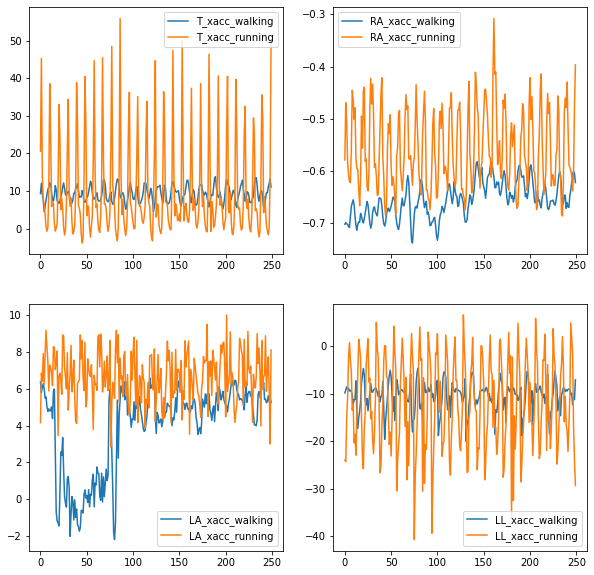

In [7]:
# Comparing the same sensor to different activities
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the first graph on the first subplot
axes[0, 0].plot(data_a10_p7.iloc[:250,0], label='T_xacc_walking')
axes[0, 0].plot(data_a12_p7.iloc[:250,0], label='T_xacc_running')
axes[0, 0].legend()

# Plot the second graph on the second subplot
axes[0, 1].plot(data_a10_p7.iloc[:250,8], label='RA_xacc_walking')
axes[0, 1].plot(data_a12_p7.iloc[:250,8], label='RA_xacc_running')
axes[0, 1].legend()

# Plot the third graph on the third subplot
axes[1, 0].plot(data_a10_p7.iloc[:250,18], label='LA_xacc_walking')
axes[1, 0].plot(data_a12_p7.iloc[:250,18], label='LA_xacc_running')
axes[1, 0].legend()

# Plot the fourth graph on the fourth subplot
axes[1, 1].plot(data_a10_p7.iloc[:250,36], label='LL_xacc_walking')
axes[1, 1].plot(data_a12_p7.iloc[:250,36], label='LL_xacc_running')
axes[1, 1].legend()

# Display the figure
plt.show()

As we can see, the values registered by the same sensor when patient 7 is running catch our eye in each graph, since the maximum value registered for each segment is always clearly superior to the maximum value registered for each segment when the patient is walking. Also, in all graphs - except the one that compares "LA_xacc" sensor - the amplitude of the registered values is much bigger. Again, in all graphs except the "LA_xacc" one, the general pattern of the registed values by the sensor when the patient is running almost perfectly overlap the values registered when the patient is walking, That is, if the values when walking rise, so do the values when running, but they do so more greatly. To clearly justify why the "LA_xacc" comparison graph behaves differently we would have to investigate more the sensor itself. Also, the quick drop in the registered values when the patient is walking could have been caused by some other reason, sush as the patient having had to take a break from walking.

## Exercise 2

Build a model (classifier) to predict the activity of a given subject. Decide on which features could be extracted from the data. For example:

- **mean, variance,skewness, and the kurtosis**. The distribution of each signal are approximately Normal. This means that we can take the first four statistical moments for each 5 second segment. By including the four moments, we are helping our models better learn the characteristic of each unique activity. 
- n first values of the  the  [**autocorrelation**](https://en.wikipedia.org/wiki/Autocorrelation) sequence. In some time series analyses, such as in [ARIMA](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average), it is desirable to minimize autocorrelation so as to transform the series into a [stationary state](https://en.wikipedia.org/wiki/Stationary_process). 
- n peaks of the [**discrete Fourier transform**](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)
of a segment with the corresponding frequencies.

Consider normalising all features between [0,1] and reduce the dimension of features using [PCA](https://en.wikipedia.org/wiki/Principal_component_analysis).


We propose 2 approaches to create your train/testing set.

(1) Train and test sets that contain shuffled samples from each user. So the model will train on data from every user and predict the activities from every user in the test set.
(2) Seven user's data will be used as the training set and only one user's data as the test set. The goal here is to predict the activities of a user that the model has never seen before. How good is the model generalising the problem?

For each approach, consider the following building framework:
1. Split data into train and holdout sets
2. Optimize model hyperparameters
3. Cross Validate model's performance by analyze learning curves

Finally, consider the follwing evaluation metrics:

**Accuracy** represents how close or far off a given set of measurements are to their true value.

**Precision**: percentage of classifications predicted to be positive are actually positive. **Precision is a measure of the failure to correctly predict positive classifications. **

$$\textbf{Precision} = \frac{TP}{TP + FP}, $$

where TP refers to True Positives and FP to False Positives. 

**Recall** describes how well the model can identify points that belong to the positive class. **Recall is a measure of the failure in distinguishing between positive and negative classifications. **

$$\textbf{Recall} = \frac{TP}{TP + FN},$$

where FN corresponds to False Negatives.

Finally, the $f_{1} score$ is a weighted average of precision and recall. The  $f_{1} score$  is used to get a measure of both types of failures.

**Note: Make comments on the code to discuss the results.**
 

Our goals:                 
    1. Get the 19 additional features for each of the original 45 features.                
    2. Normalize all feature between $[0,1]$                      
    3. Reduce dimentions of each segment                              
    4. Stack the segments to build a data set for each person                       

##### Extracting features: mean, variance, skewness, kurtosis + autocorrelation

In [8]:
data_home = "C://Users//Margarida//Desktop//Mestrado//2nd semester//Data Science for Health//Assignment 2//data1//data//"

Creating a function to take a dataframe and compute the features that we need to predict further on and add it to the dataframe itself.

In [9]:
def autocorr(data):
    autocorr_vals = np.correlate(data,data,mode='full')
    autocorr_vals = autocorr_vals[int(autocorr_vals.size/2.0):]
    return autocorr_vals

In [10]:
def create_ft(df, label):
    data = df.values.astype(float)
    data = df.T.values.tolist()
    # getting required features !
    # increasing peaks will increase data overall -> longer training time 
    max_peaks=10
    features = [[np.mean(row), np.std(row), stats.kurtosis(row), stats.skew(row)] +
                      autocorr(row)[0:10].tolist() +
                      np.sort(rfft(row))[:-1][-max_peaks:].tolist() +
                      [np.mean(row), np.std(row), stats.skew(row), stats.kurtosis(row)] for row in data]

    n_row = df.T.shape[0]  
    for row_i in range(n_row):
        data[row_i].extend(features[row_i])
        
    data = np.array(data).flatten()
    data = data.tolist()
    data.append(label)
    return data

Defining names of activities, patients and segments so we can read the corresponding files

In [11]:
# ACTIVITIES: total of 19
activities = ["a0{}".format(num) if num < 10 else "a{}".format(num) for num in np.arange(1, 20)]

# PARTICIPANTS: 8 in total
patients = ["p{}".format(num) for num in np.arange(1,9,1)]

Now, we create a loop that iterates through all the files in the data1 folder: first through patients for one activity, getting the features required and appending them to the dataframe (one for each patient and for each activity)

In [12]:
def extract_all(activity, patient):
    segments = ["s0{}.txt".format(num) if num < 10 else "s{}.txt".format(num) for num in np.arange(1, 61)]
    
    DF = defaultdict(list)
    for n_a, activity in enumerate(activity):
        # n_a will keep track of the activity and will be added to the dataframe so we can now
        # from which segment a certain activity is from!
        n_a += 1
        print('Processing activity ', activity)
        for n_p, p in enumerate(patient):
            n_p += 1
            print('Processing patient ', p)
            for n_i, segment in enumerate(segments): 
                print('Processing segment ', segment)
                n_i += 1
                directory = data_home + activity + "//" + p + "//" + segment
                df = pd.read_csv(directory, header=None)
                expanded_data = create_ft(df, n_a)
                # each segment is now a row 
                DF[n_p].append(expanded_data)   
    return DF

In [13]:
# takes some time!!!
DF = extract_all(activities, patients)

Processing activity  a01
Processing patient  p1
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt


Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p6
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.t

Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p3
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.t

Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p8
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.t

Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  

Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  

Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  

Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p3
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.t

Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p8
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.t

Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p5
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.t

Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p2
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.t

Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  

Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  

Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  

Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p5
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.t

Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p2
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.t

Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p7
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.t

Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p4
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.t

Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  

Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  

Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  

Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p7
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.t

Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p4
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.t

Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing activity  a15
Processing patient  p1
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt


Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p6
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.t

Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  

Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  

Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt
Processing segment  s31.txt
Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  

Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing activity  a18
Processing patient  p1
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.txt
Processing segment  s27.txt
Processing segment  s28.txt
Processing segment  s29.txt
Processing segment  s30.txt


Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p6
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.txt
Processing segment  s15.txt
Processing segment  s16.txt
Processing segment  s17.txt
Processing segment  s18.txt
Processing segment  s19.txt
Processing segment  s20.txt
Processing segment  s21.txt
Processing segment  s22.txt
Processing segment  s23.txt
Processing segment  s24.txt
Processing segment  s25.txt
Processing segment  s26.t

Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p3
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.txt
Processing segment  s07.txt
Processing segment  s08.txt
Processing segment  s09.txt
Processing segment  s10.txt
Processing segment  s11.txt
Processing segment  s12.txt
Processing segment  s13.txt
Processing segment  s14.t

Processing segment  s32.txt
Processing segment  s33.txt
Processing segment  s34.txt
Processing segment  s35.txt
Processing segment  s36.txt
Processing segment  s37.txt
Processing segment  s38.txt
Processing segment  s39.txt
Processing segment  s40.txt
Processing segment  s41.txt
Processing segment  s42.txt
Processing segment  s43.txt
Processing segment  s44.txt
Processing segment  s45.txt
Processing segment  s46.txt
Processing segment  s47.txt
Processing segment  s48.txt
Processing segment  s49.txt
Processing segment  s50.txt
Processing segment  s51.txt
Processing segment  s52.txt
Processing segment  s53.txt
Processing segment  s54.txt
Processing segment  s55.txt
Processing segment  s56.txt
Processing segment  s57.txt
Processing segment  s58.txt
Processing segment  s59.txt
Processing segment  s60.txt
Processing patient  p8
Processing segment  s01.txt
Processing segment  s02.txt
Processing segment  s03.txt
Processing segment  s04.txt
Processing segment  s05.txt
Processing segment  s06.t

In [14]:
np.array(DF[1]).shape

(1140, 6886)

##### Creating a dataframe for each patient/participant

Now that we have a full dictionary with all our data, we can separate it into smaller patients data, since our goal is to make predictions!

In [15]:
def create_individual_data(DF):
    X = [ [row[:-1] for row in DF[patient]] for patient in DF.keys() ]
    Y = [ [row[-1] for row in DF[patient]] for patient in DF.keys() ] 
    return np.array(X), np.array(Y)

In [16]:
# takes some time!!!
patients_values, patients_predictor = create_individual_data(DF)

Now we normalize, as required.              
It's important to notice that scaling all the data might result in data leakage because we're scaling taking into consideration data that will be the test set when training a classifier, which is a set that supposedly we shouldn't have access to.

In [18]:
scaled_data = np.array([StandardScaler().fit_transform(patients_values[i]) for i in np.arange(0, patients_values.shape[0], 1)])

Using PCA as requested to reduce dimensions of each segment.               
In order to choose the number of components to keep for the PCA, we can see how the explained variance behaves!

In [19]:
pca_aux_component = PCA()
pca_aux_component.fit(scaled_data[0]); # taking a random instance

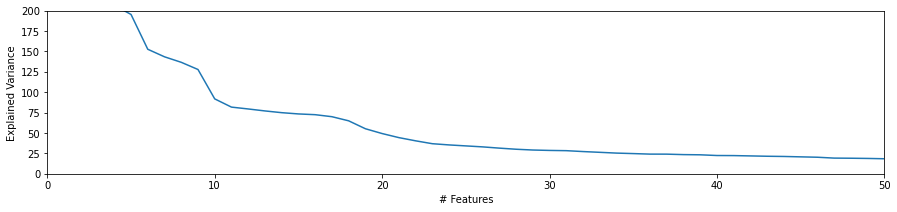

In [32]:
plt.figure(figsize = (15, 3))
plt.ylabel("Explained Variance")
plt.xlabel("# Features")
plt.plot(pca_aux_component.explained_variance_[:60])
plt.ylim(0,200)
plt.xlim(0,50);

It seems to stabilize from 35 features
We'll use those 35 features.

In [21]:
# take the first 35 components
pca = PCA(n_components=35)
reduced_data = np.array([pca.fit_transform(p) for p in scaled_data])

#### Splitting the dataset into training and testing using different approaches.

The base model we'll use is the Gradient Boosting Classifier, using stratified K fold with 10 splits, performing cross validation in the main arguments from the classifier. We'll also extract all scores, instead of only using the accuracy.

In [22]:
# defining function to get scores
def get_scores(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred,average='weighted')
    rec = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')
    return acc, prec,rec,f1

##### Approach 1: train the model on every user and predict activity for every user

In [24]:
X_final = np.concatenate(reduced_data)
y_final = np.concatenate(patients_predictor)

##### Defining function to use classifier Random Forest and return the scores

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,make_scorer
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
def rforest(X, y,splits=10):
    skf = StratifiedKFold(n_splits=splits, shuffle=True, random_state=1)
    for train_index, test_index in skf.split(X,y):
        X_train,y_train = X[train_index,:],y[train_index]
        X_test,y_test = X[test_index,:],y[test_index]
        # where grid search will be performed
        param_grid ={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None], 
                  }
        scoring = {'accuracy': make_scorer(accuracy_score)} 
        grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, n_jobs=-1,
                                   scoring=scoring, refit='accuracy')
        
        # Fit the grid search object to the data
        grid_search.fit(X_train, y_train)
        
        # obtaining the best model according to grid search
        rf_model = grid_search.best_estimator_
        prediction = grid_search.predict(X_test)
        metrics = get_scores(y_test,prediction)
        return rf_model, metrics

In [44]:
# takes some time!!!
approach1 = rforest(X_final,y_final)

In [45]:
print('Metrics:',approach1[1])

Metrics: (0.9879385964912281, 0.9883720336428398, 0.9879385964912281, 0.9879145606224762)


##### Approach 1: Cross-validation model's performance with learning curves

In [33]:
# defining function to plot learning curve
def learning_curve(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(model[0], X, y, cv=10, 
                                                       scoring='accuracy', 
                                                       n_jobs=-1,
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

    # mean and standard deviation
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, val_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
    plt.xlabel('Training set size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()
    return None

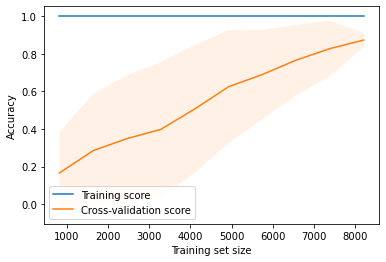

In [47]:
# takes some time!!!
learning_curve(approach1[0],X_final,y_final)

##### Approach 2: train on a subset of a patient's data and predict the the activities for all the remaining patients

In [27]:
# using 7 users to train
X_train_2 = reduced_data[1:]
y_train_2 =  patients_predictor[1:] 

# testing on the remainer user  -> remember reduced data all normalized data! 
X_test_2 = reduced_data[0]
y_test_2 = patients_predictor[0]

In [28]:
X_train_2_ = np.concatenate(X_train_2)
y_train_2_ = np.concatenate(y_train_2)

In [29]:
# predicting...
approach2 = rforest(X_train_2_,y_train_2_)

In [30]:
# obtaining the metrics
print('Metrics approach2:',approach2[1])

Metrics approach2: (0.9786967418546366, 0.9800013062346093, 0.9786967418546366, 0.9791382817229076)


##### Approach 2: Cross-validation model's performance with learning curves

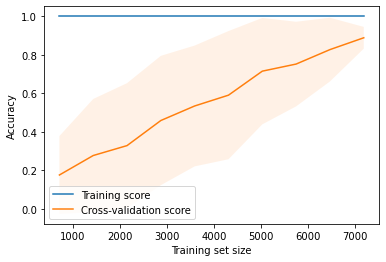

In [31]:
# retrieve the function previously created
learning_curve(approach2[0],X_train_2_,y_train_2_)

## Conclusions: analyzing accuracy, precision, recall and f1 score

The metrics obtained for both of the approaches are quite good. However, we can see that the metrics for the second approach are slighlty lower than those of the first approach. 
The learning rate curves also look really similar!
Here is a table summarizing the scores obtained:

|Approach| Accuracy | Precision | Recall| F1 score |
|--------|----------|-----------|--------|----------|
| Approach 1  | 0.9879  | 0.988   | 0.9879 | 0.9879 |
| Approach 2 | 0.9787  | 0.98 |0.9791|0.9791 |


All metrics for approach 1 are better than those of approach two, almost hitting 99%. On the other hand, if we were to round the second approaches' metrics we would hit 98%, a difference of 1 percent point.        
I would have also like to see the difference in the metrics using different classifiers, such as RandomForestClassifier or XGboost. Due to time constraints this wasn't possible. Tree-based methods are known to be generally really good predictors, this being the reason why I chose GradientBoost as a classifier.

It might not be a good idea to try and predict a specific patient's activity from other patient's history of activities, since all people behave differently. In a different context with other patients the decrease in the metrics can be even bigger.

Nonetheless, this model does a pretty good job in both approaches!           
It should be noted that both approach are highly demanding computational-time-wise. The training takes a couple of hours for each of the approaches. Because we have a very big data set, having a high computation-time is expected by nature. However, considering we're doing folds and grid searches simultaneously, the computational-time will increase considerably. 